In [76]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!unzip "drive/MyDrive/dog-breed-identification.zip" -d "drive/MyDrive/Dog Vision/"

#END-TO-END MULTI-CLASS DOG BREED CLASSIFICATION

Using Tensorflow 2 and Tensorflow Hub

###PROBLEM:
Identifying the breed of a dog given in an image of a dog.

###DATA:
From kaggle's dog breed identification competition

###EVALUATION:
A file with prediction probabilities for each dog breed of each test image.

###FEATURES:
* Unstructed data
* 120 breeds of dogs
* 10k+ images in training and test set each(no labels)

In [ ]:
#Import Tensorflow , Tensorfloew Hub

import tensorflow as tf
import tensorflow_hub as hub
print("TF version", tf.__version__)
print("TF Hub version", hub.__version__)

TF version 2.15.0
TF Hub version 0.16.1


In [ ]:
#Check for GPU availability
print("GPU", "available (YESSSSSS!!!!)" if tf.config.list_physical_devices("GPU") else "not available")

GPU not available


#Getting data ready(turning into tensors)
Getting images to numerical format

Let's start by accessing our data and checking out the labels.

In [ ]:
#checkout the labels of out data
import pandas as pd

labels_csv=pd.read_csv("drive/MyDrive/Dog Vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


<Axes: xlabel='breed'>

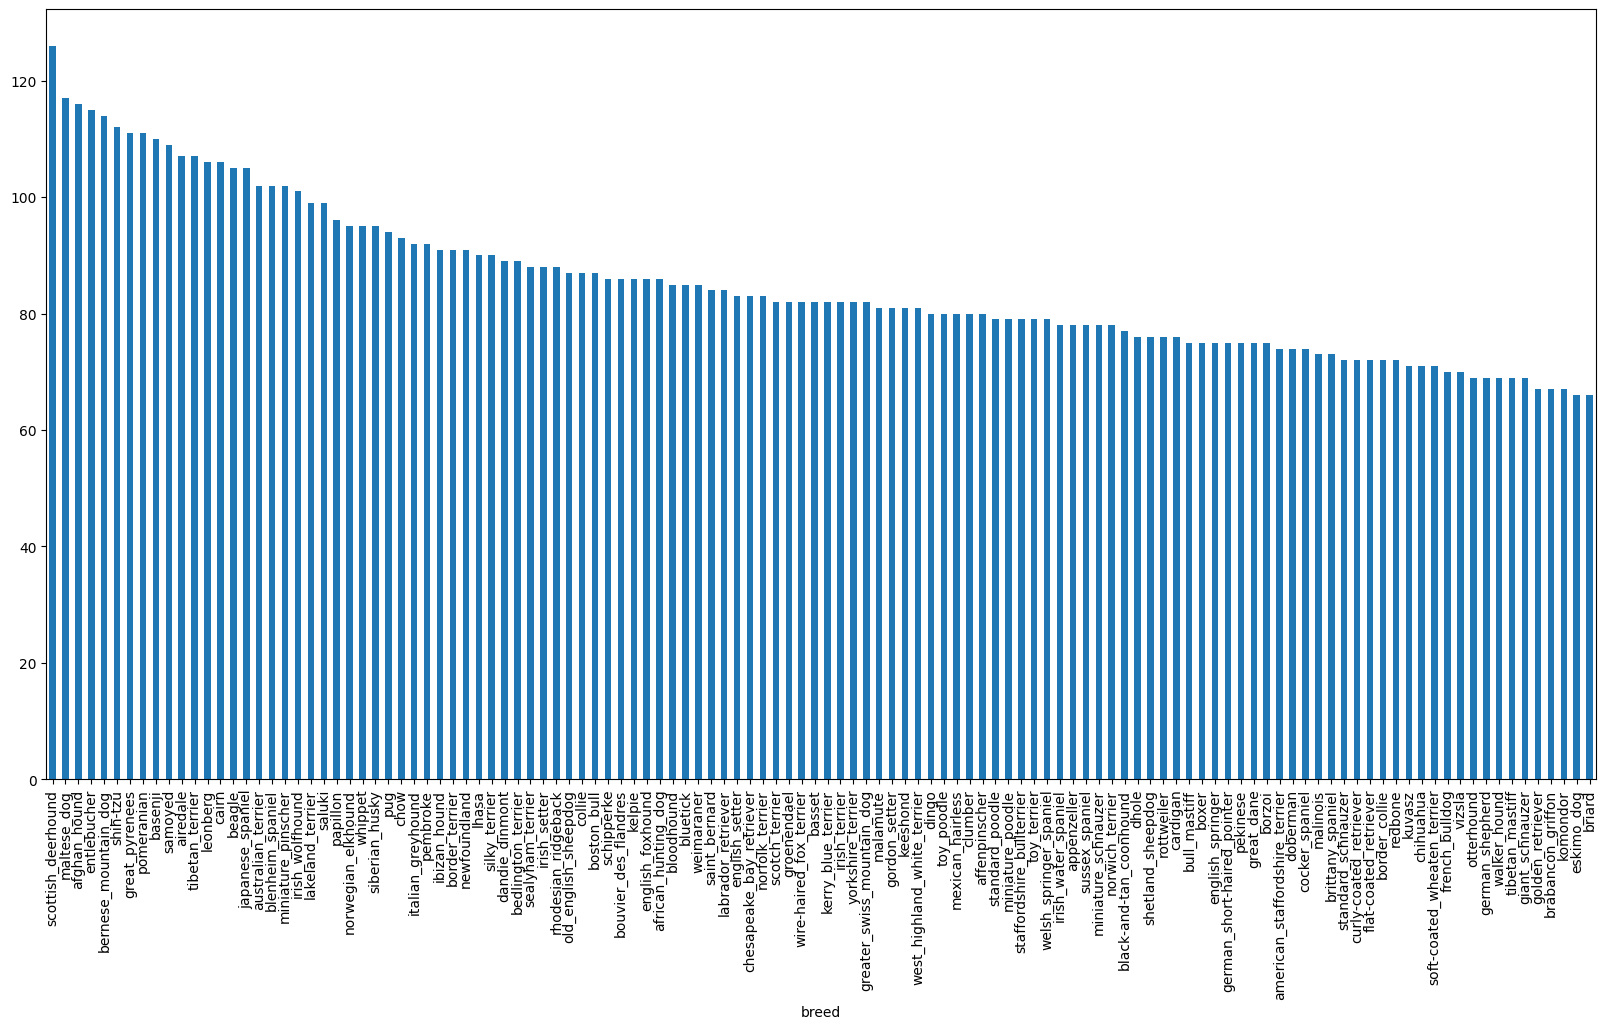

In [ ]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

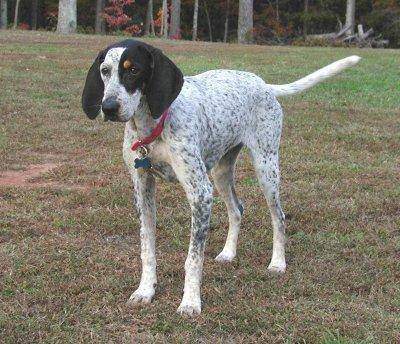

In [ ]:
#Lets view and image

from IPython.display import Image

Image("drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg")

### Getting images and their labels



In [ ]:
#Create pathnames from image ID's

filename= ["drive/MyDrive/Dog Vision/train/" + fname +".jpg" for fname in labels_csv["id"] ]
filename

['drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 'drive/MyDrive/Dog Vision/train/004396df1acd0f1247b740ca2b14616e.jpg',
 'drive/MyDrive/Dog Vision/train/0067dc3eab0b3c3ef0439477624d85d6.jpg',
 'drive/MyDrive/Dog Vision/train/00693b8bc2470375cc744a6391d397ec.jpg',
 'drive/MyDrive/Dog Vision/train/006cc3ddb9dc1bd827479569fcdc52d

In [ ]:
import os
len(filename), len(os.listdir("drive/MyDrive/Dog Vision/train/"))

(10222, 10222)

In [ ]:
#check whether number of filenames matches number of actual files


if len(os.listdir("drive/MyDrive/Dog Vision/train/"))==len(filename):
  print("CORRECT!!!")
else:
  print("WRONG!!!")


CORRECT!!!


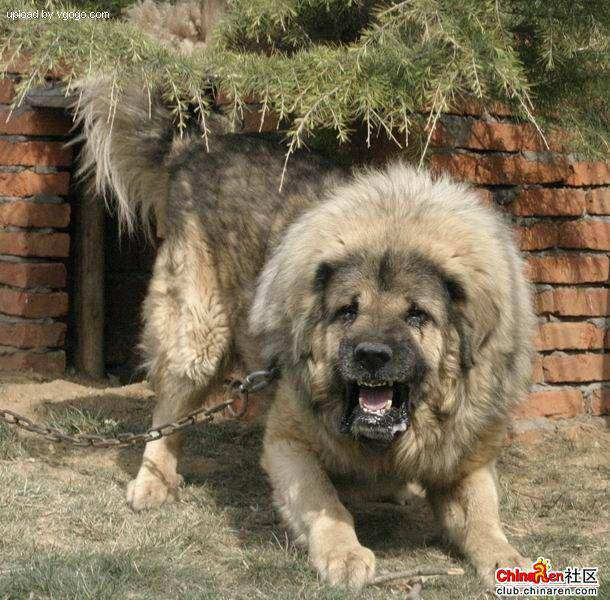

In [ ]:
Image(filename[9000])

In [ ]:
import numpy as np
labels=labels_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
len(unique_breeds)

120

In [ ]:
#turn s single label into an array of booleans

print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
#Now every label

boolean_labels= [label==unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
#turning boolean arrays to integers

print(labels[0]) #orginal label
print (np.where(unique_breeds==labels[0])) #index where label occurs
print(boolean_labels[0].argmax()) #index where label occurs in boolean array
print(boolean_labels[0].astype(int)) #there will be a 1 where sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


###Creating our own validation set

In [ ]:
#start with 1000 images

x=filename
y=boolean_labels

NUM_IMAGES= 1000 #@param{type:"slider", min:1000, max:10000, step:1000}

In [ ]:
#split our data

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val=train_test_split(x[:NUM_IMAGES], y[:NUM_IMAGES], test_size=0.2, random_state=42)

len(x_train),len(x_val),len(y_train),len(y_val)

(800, 200, 800, 200)

###Turning images into tensors

* Take an image filepath as input
* Use TensorFlow to read the file and save it to a variable, `image`
* Turn our `image` (a jpg) to Tensors
* Normalize our image(ocnvert colour channel values from 0-255 to 0-1)
* Resize the `image` to a shape(224,224)
* Return the modified `image`

In [ ]:
#convert to numpy array

from matplotlib.pyplot import imread
image=imread(filename[42])
image.shape

(257, 350, 3)

In [ ]:
#turn image to a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

In [ ]:
#Define image size
IMG_SIZE= 128

#Create a function for preprocessing images
def process_image(image_path):
  """
  Takes an image and turns into tensor.
  """

  image=tf.io.read_file(image_path)
  image=tf.image.decode_jpeg(image, channels=3)
  image=tf.image.convert_image_dtype(image,tf.float32)
  image=tf.image.resize(image, size=[IMG_SIZE,IMG_SIZE])

  return image

### Turning data to Batches

Not all images might fit into memory in one go.
so thats why we do about 32 images at a time(manually adjusted)

In [ ]:
#a method to return a tuple

def get_image_label(image_path, label):

  image=process_image(image_path)
  return image,label

In [ ]:
#Define batch size
BATCH_SIZE=32

#fucntion to turn data to batches
def create_data_batches(x,y=None, batch_size= BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image(x) and label(y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data
  also accepts test data as input (no labels).
  """

  #if the data is a test dataset, we probably don't have labels

  if test_data:
    print("Creating test data batches....")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x)))
    data_batch=data.map(process_image).batch(BATCH_SIZE)

    return data_batch

  elif valid_data:
    print("Creating validation data batches.....")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y)))
    data_batch=data.map(get_image_label).batch(BATCH_SIZE)

    return data_batch

  else:
    print("Creating training data batches.....")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y)))
    data=data.shuffle(buffer_size=len(x))
    data_batch=data.map(get_image_label).batch(BATCH_SIZE)

    return data_batch


In [ ]:
train_data=create_data_batches(x_train, y_train)
val_data=create_data_batches(x_val, y_val, valid_data=True)

Creating training data batches.....
Creating validation data batches.....


In [ ]:
#Check out different attributes of our batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## VISUALIZING DATA BATCHES


In [ ]:
import matplotlib.pyplot as plt

def show_25_images(images, labels):
  """
  Display a plot of 25 images from a data batch
  """

  plt.figure(figsize=(10,10))

  for i in range(25):
    ax=plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()]) #doubt
    plt.axis("off")

In [ ]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
train_images, train_labels= next(train_data.as_numpy_iterator())
train_images, train_labels

(array([[[[7.09656298e-01, 8.26876104e-01, 8.65237296e-01],
          [6.76246405e-01, 8.24101985e-01, 8.87035668e-01],
          [6.90548480e-01, 8.43489647e-01, 9.10156250e-01],
          ...,
          [6.49633765e-01, 8.02771330e-01, 8.73216152e-01],
          [6.49044991e-01, 8.03360105e-01, 8.72921765e-01],
          [6.45326912e-01, 7.75412738e-01, 8.14996064e-01]],
 
         [[7.19888628e-01, 8.53814185e-01, 9.02746856e-01],
          [6.36764705e-01, 7.98835874e-01, 8.70634496e-01],
          [6.51654422e-01, 8.23437572e-01, 9.04258668e-01],
          ...,
          [6.31286144e-01, 8.03431451e-01, 8.88158739e-01],
          [6.30698800e-01, 8.03799093e-01, 8.87423456e-01],
          [6.78662360e-01, 8.08748186e-01, 8.48331511e-01]],
 
         [[7.21298456e-01, 8.74253511e-01, 9.40927148e-01],
          [6.42315567e-01, 8.25557053e-01, 9.15764153e-01],
          [6.07954443e-01, 8.04044187e-01, 9.02105927e-01],
          ...,
          [6.17456079e-01, 8.04928601e-01, 9.0376

In [ ]:
len(train_images), len(train_labels)

(32, 32)

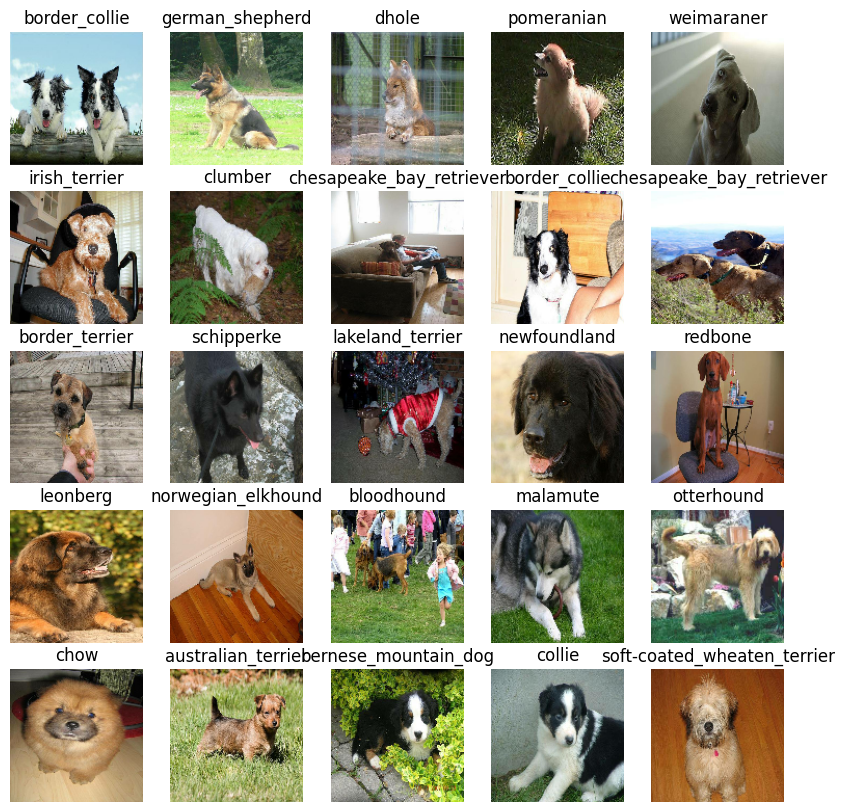

In [ ]:
show_25_images (train_images, train_labels)

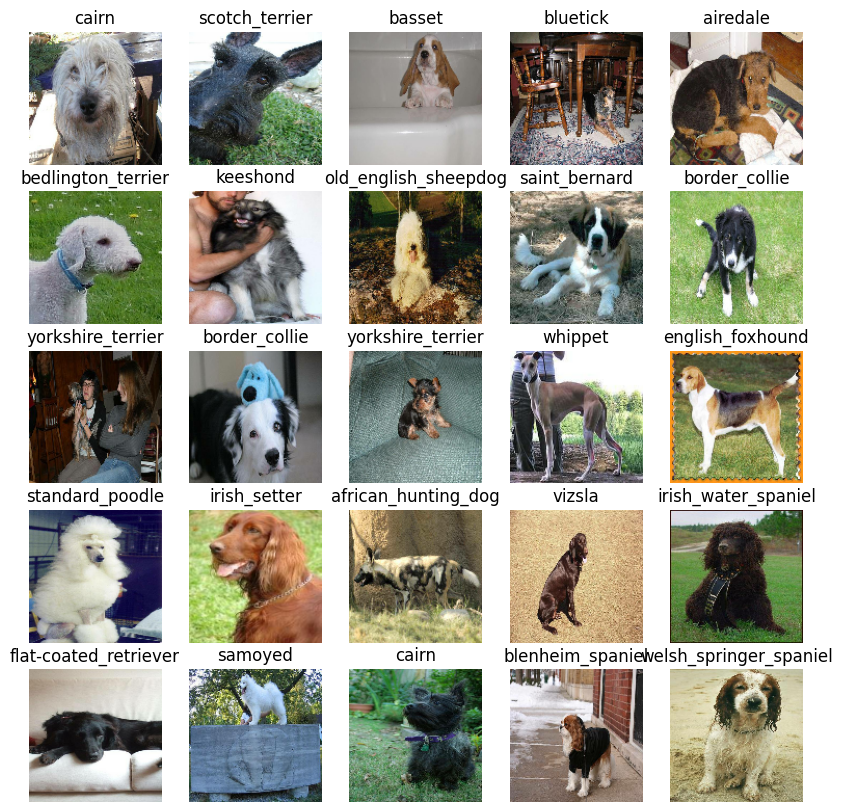

In [ ]:
val_images, val_labels=next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

##BUILDING A MODEL

We need to define:
* The input shape(our images shape in the form of tensors)
* The output shape(image labels, in the form of Tensors)
* The URL of the model we want to use

In [ ]:
INPUT_SHAPE=[None, 128,128,3] #batch , height , width, color channels
OUTPUT_SHAPE=len(unique_breeds)

MODEL_URL= "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-128-classification/2"


Putting them together into keras deep learning model

lets creates as function that:
* Takes the input shape, output shape and the model we've chosen as parameters.
* Defines the layers in a keras model in sequential fashion
* Compiles the model
* Builds the model
* Returns the model



In [ ]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url= MODEL_URL):
  print("Building model with:", MODEL_URL)

  model=tf.keras.Sequential([hub.KerasLayer(MODEL_URL), #layr1 input layer
                             tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                                                   activation="softmax")]) #layer2 output layer


  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  model.build(INPUT_SHAPE)

  return model

In [ ]:
model=create_model()
model.summary

Building model with: https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-128-classification/2


<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7cebf7fba2f0>>

### CREATE CALLBACKS

callbacks are helper functions a model can use during training to do such things as save its progress, check its progresss or stop training early if a model stops improving.

 We will create two callbacks, one for TensorBoard which helps track our model's progress and another for early stopping that prevents our model from training for too long.

 ##### TENSORBOARD CALLBACK:
 * Load the tesorboard notebook extension
 * Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's `fit()` fucntion.
 * Visualize our models training logs with `%tensorboard` magic function

In [ ]:
%load_ext tensorboard

In [ ]:
import datetime

def create_tensorboard_callback():
  logdir=os.path.join("drive/MyDrive/Dog Vision/logs",
                      datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

  return tf.keras.callbacks.TensorBoard(logdir)

#### EARLY STOPPING CALLBACK

Early stopping helps stop our model from overfitting by stopping training if certain evaluation metric stops improving

In [ ]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                patience=3)

#Training our model(on a subset of data)

In [ ]:
NUM_EPOCHS=10 #@param{type:"slider", min:10, max:100,step:10}

Let's create a fucntion that trains a model:
  * Create a model using `create_model()`
  * Setup a TensorBoard callback using `create_tensorboard_callback()`
  * Call the fit function on our model passing it the training data,validation data, number of epochs to train for (`NUM_EPOCHS`) and the callbacks
  * Return the model


In [ ]:
def train_model():
  model=create_model()

  tensorboard=create_tensorboard_callback()

  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data= val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])

  return model

In [ ]:
model = train_model()

Building model with: https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-128-classification/2
Epoch 1/10
25/25 [==============================] - 330s 13s/step - loss: 5.6997 - accuracy: 0.0475 - val_loss: 4.9200 - val_accuracy: 0.0700
Epoch 2/10
25/25 [==============================] - 9s 362ms/step - loss: 2.3702 - accuracy: 0.4187 - val_loss: 3.9109 - val_accuracy: 0.1550
Epoch 3/10
25/25 [==============================] - 10s 418ms/step - loss: 1.0718 - accuracy: 0.7812 - val_loss: 3.6677 - val_accuracy: 0.2000
Epoch 4/10
25/25 [==============================] - 8s 293ms/step - loss: 0.5167 - accuracy: 0.9475 - val_loss: 3.5892 - val_accuracy: 0.2100
Epoch 5/10
25/25 [==============================] - 9s 358ms/step - loss: 0.2691 - accuracy: 0.9925 - val_loss: 3.6397 - val_accuracy: 0.2150
Epoch 6/10
25/25 [==============================] - 9s 346ms/step - loss: 0.1677 - accuracy: 1.0000 - val_loss: 3.6465 - val_accuracy: 0.2350
Epoch 7/10
25/25 [=====================

our model is ovrfitting as it performs far better on the training dataset than validation dataset

### CHECKING THE TENSORBOARD LOGS

The Tensorboard magic function(%tensorboard) will access the logs directory we created earier and visualize its contents

In [ ]:
%tensorboard --logdir drive/MyDrive/Dog\ Vision/logs

<IPython.core.display.Javascript object>

### MAKING AND EVALUATING PREDICTIONS USING A TRAINED MODEL

In [ ]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
predictions= model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 6s 187ms/step


array([[1.9008193e-04, 7.8138392e-03, 5.5116470e-05, ..., 7.2932417e-05,
        1.1120323e-02, 1.3719331e-02],
       [5.3848093e-04, 1.7864081e-03, 2.7616736e-01, ..., 6.4189524e-05,
        7.0683840e-03, 6.1440442e-05],
       [2.8542550e-07, 2.1018069e-03, 5.1273191e-06, ..., 1.5061675e-02,
        2.1393200e-04, 1.0847199e-02],
       ...,
       [1.5175439e-04, 2.7551610e-04, 1.2784975e-04, ..., 1.2688729e-04,
        5.4010144e-04, 1.9332427e-03],
       [9.3197210e-05, 7.9325521e-03, 1.4154630e-05, ..., 1.2634938e-04,
        1.4729228e-05, 1.4563584e-04],
       [7.7409305e-07, 1.8673489e-04, 1.6362674e-04, ..., 1.9398460e-03,
        8.7160256e-04, 1.8315663e-04]], dtype=float32)

In [ ]:
predictions.shape, len(y_val), len(unique_breeds)

((200, 120), 200, 120)

In [ ]:
predictions[0]

array([1.90081933e-04, 7.81383924e-03, 5.51164703e-05, 5.51188888e-04,
       9.44455795e-04, 2.05199012e-05, 8.75198655e-03, 1.14864597e-04,
       1.14738850e-05, 5.08121957e-05, 4.97403834e-03, 4.90204140e-04,
       3.94976960e-05, 1.90686260e-05, 3.45052849e-03, 5.19047862e-05,
       5.72791687e-05, 1.96241960e-03, 2.47048825e-04, 1.55196212e-05,
       2.14023143e-03, 6.64353647e-05, 1.43617854e-06, 3.76732845e-04,
       1.19986862e-05, 1.28782427e-04, 3.80491614e-02, 2.04828146e-04,
       6.60302583e-04, 2.19229303e-04, 2.46651907e-04, 1.56069389e-02,
       3.74928204e-04, 3.37458878e-05, 9.44629195e-04, 8.72620195e-03,
       2.36511369e-06, 5.33772254e-05, 1.58272055e-03, 3.77568904e-05,
       3.40028591e-02, 4.61634882e-05, 5.00675515e-06, 4.29574284e-05,
       1.27969927e-03, 6.29397937e-06, 1.49724554e-04, 1.22825993e-04,
       2.24389764e-03, 9.79602570e-04, 5.18496498e-04, 2.84996349e-05,
       3.75719629e-02, 1.78796417e-05, 2.43723451e-04, 2.14628981e-05,
      

In [ ]:
len(predictions[0])

120

In [ ]:
np.sum(predictions[0])

0.9999999

In [ ]:
index=42
print(predictions[0])
print(f"Max value : {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max Index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[1.90081933e-04 7.81383924e-03 5.51164703e-05 5.51188888e-04
 9.44455795e-04 2.05199012e-05 8.75198655e-03 1.14864597e-04
 1.14738850e-05 5.08121957e-05 4.97403834e-03 4.90204140e-04
 3.94976960e-05 1.90686260e-05 3.45052849e-03 5.19047862e-05
 5.72791687e-05 1.96241960e-03 2.47048825e-04 1.55196212e-05
 2.14023143e-03 6.64353647e-05 1.43617854e-06 3.76732845e-04
 1.19986862e-05 1.28782427e-04 3.80491614e-02 2.04828146e-04
 6.60302583e-04 2.19229303e-04 2.46651907e-04 1.56069389e-02
 3.74928204e-04 3.37458878e-05 9.44629195e-04 8.72620195e-03
 2.36511369e-06 5.33772254e-05 1.58272055e-03 3.77568904e-05
 3.40028591e-02 4.61634882e-05 5.00675515e-06 4.29574284e-05
 1.27969927e-03 6.29397937e-06 1.49724554e-04 1.22825993e-04
 2.24389764e-03 9.79602570e-04 5.18496498e-04 2.84996349e-05
 3.75719629e-02 1.78796417e-05 2.43723451e-04 2.14628981e-05
 5.96814534e-05 7.47838523e-04 2.33373605e-04 2.41735484e-02
 9.01339627e-06 5.41243389e-05 4.35851701e-03 1.52027395e-04
 8.43022717e-04 2.447764

In [ ]:
unique_breeds[15]

'bluetick'

see images and do it at scale

### TURN PROBABILITIES INTO THEIR RESPECTIVE LABLELS

In [ ]:
def get_pred_label(prediction_probabilities):
  return unique_breeds[np.argmax(prediction_probabilities)]

pred_label= get_pred_label(predictions[81])
pred_label

'lakeland_terrier'

we need to unbatch our data

In [ ]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
def unbatchify(data):
  images=[]
  labels=[]

  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])

  return images,labels

val_images, val_labels=unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.25828475, 0.36198825, 0.24389817],
         [0.39360544, 0.3418826 , 0.30183154],
         [0.8296768 , 0.7504122 , 0.74760556],
         ...,
         [0.8228947 , 0.8611053 , 0.8719636 ],
         [0.76902866, 0.8160875 , 0.8079686 ],
         [0.8183106 , 0.82737565, 0.84341663]],
 
        [[0.30484715, 0.29425842, 0.2039199 ],
         [0.4352226 , 0.37971696, 0.31883615],
         [0.8593526 , 0.80739874, 0.77293175],
         ...,
         [0.85530514, 0.89059925, 0.917223  ],
         [0.80846506, 0.8516023 , 0.8737746 ],
         [0.7754192 , 0.8053707 , 0.84239584]],
 
        [[0.75496686, 0.6921665 , 0.66526437],
         [0.807427  , 0.804948  , 0.7710658 ],
         [0.9814564 , 0.9935267 , 0.971697  ],
         ...,
         [0.91192657, 0.94484705, 0.9793709 ],
         [0.8952671 , 0.9312506 , 0.98800606],
         [0.8093318 , 0.85525966, 0.91700304]],
 
        ...,
 
        [[0.45503026, 0.4585416 , 0.41656855],
         [0.5492001 , 0.5392863 , 0.49725

In [ ]:
images_=[]
labels_=[]

for image, label in val_data.unbatch().as_numpy_iterator():
  images_.append(image)
  labels_.append(label)

images_[0], labels_[0]

(array([[[0.25828475, 0.36198825, 0.24389817],
         [0.39360544, 0.3418826 , 0.30183154],
         [0.8296768 , 0.7504122 , 0.74760556],
         ...,
         [0.8228947 , 0.8611053 , 0.8719636 ],
         [0.76902866, 0.8160875 , 0.8079686 ],
         [0.8183106 , 0.82737565, 0.84341663]],
 
        [[0.30484715, 0.29425842, 0.2039199 ],
         [0.4352226 , 0.37971696, 0.31883615],
         [0.8593526 , 0.80739874, 0.77293175],
         ...,
         [0.85530514, 0.89059925, 0.917223  ],
         [0.80846506, 0.8516023 , 0.8737746 ],
         [0.7754192 , 0.8053707 , 0.84239584]],
 
        [[0.75496686, 0.6921665 , 0.66526437],
         [0.807427  , 0.804948  , 0.7710658 ],
         [0.9814564 , 0.9935267 , 0.971697  ],
         ...,
         [0.91192657, 0.94484705, 0.9793709 ],
         [0.8952671 , 0.9312506 , 0.98800606],
         [0.8093318 , 0.85525966, 0.91700304]],
 
        ...,
 
        [[0.45503026, 0.4585416 , 0.41656855],
         [0.5492001 , 0.5392863 , 0.49725

In [ ]:
get_pred_label(labels_[0])

'cairn'

In [ ]:
get_pred_label(val_images[0])

'kerry_blue_terrier'

now creating a function that:
* Takes an array of prediction probabilties, an array of truth labels and an array of images and integers
* Convert the prediction probabilties to a predicted label.
* Plot the predicted label, its predicted probability, the teuth level and the target image on a single plot

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  pred_prob, true_label, image= prediction_probabilities[n], labels[n], images[n]

  pred_label = get_pred_label(pred_prob)

  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  if pred_label==true_label:
    color= "green"
  else:
    color= "red"

  plt.title("{} {:2.0f}% {}".format(pred_label,
                                     np.max(pred_prob)*100,
                                    true_label),
            color=color)

  plt.show()


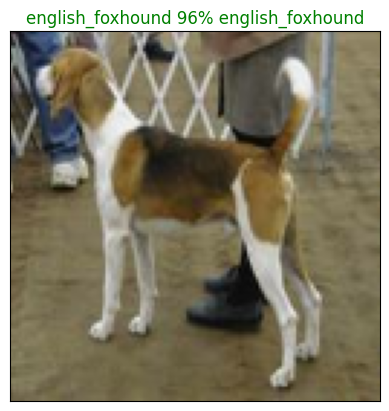

In [ ]:
plot_pred(prediction_probabilities=predictions, labels=val_labels, images=val_images, n=90)

viewing model's top 10 prediction



In [ ]:
def  plot_pred_conf(prediction_probabilities, labels, n=1):
  pred_prob, true_label= prediction_probabilities[n], labels[n]

  pred_label=get_pred_label(pred_prob)

  top_10_pred_indexes= pred_prob.argsort()[-10:][::-1]
  top_10_pred_values= pred_prob[top_10_pred_indexes]
  top_10_pred_labels= unique_breeds[top_10_pred_indexes]


  top_plot=plt.bar(np.arange(len(top_10_pred_labels)),
                   top_10_pred_values,
                   color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels==true_label)].set_color("green")
  else:
    pass

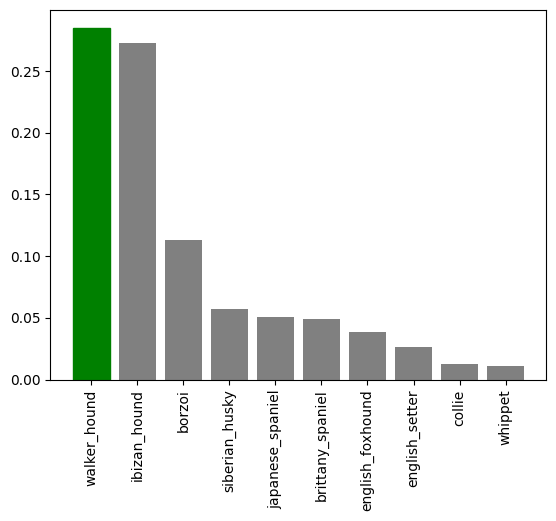

In [ ]:
plot_pred_conf(predictions,val_labels, 32)

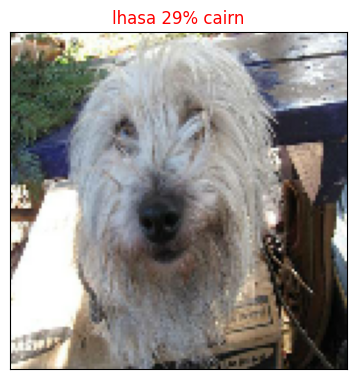

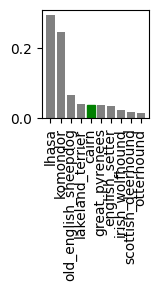

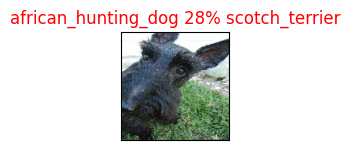

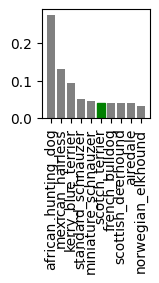

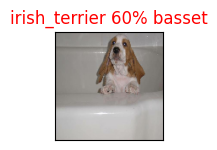

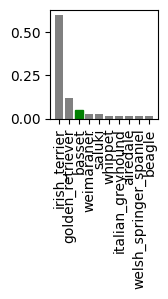

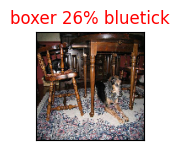

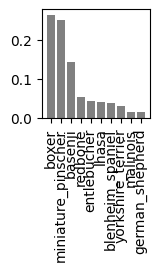

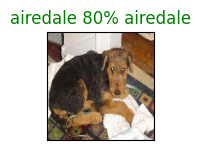

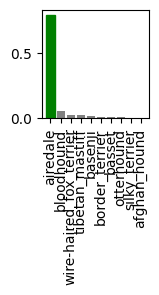

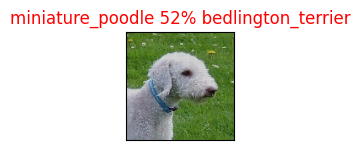

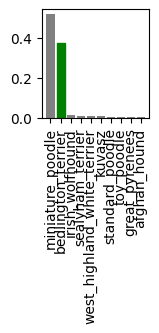

In [ ]:
#let's check out a few predictions and their different values

i_multiplier=0
num_rows=3
num_cols=2
num_images=num_rows*num_cols
plt.figure(figsize=(10*num_cols,5*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels= val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
  plt.show()

## SAVING AND LOADING A MODEL

In [ ]:
def save_model(model, suffix=None):
  model_dir= os.path.join("drive/MyDrive/Dog Vision/models", datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path= model_dir + "-" + suffix +".h5"
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
def load_model(path):
  print(f"Loading saved model from: {path}....")
  model=tf.keras.models.load_model(path, custom_objects={"KerasLayer":hub.KerasLayer})

  return model

In [ ]:
save_model(model, suffix="1000-images-mobilenetv2-Adam")

Saving model to: drive/MyDrive/Dog Vision/models/20240525-13091716642552-1000-images-mobilenetv2-Adam.h5...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'drive/MyDrive/Dog Vision/models/20240525-13091716642552-1000-images-mobilenetv2-Adam.h5'

In [ ]:
model.evaluate(val_data)

7/7 [==============================] - 2s 192ms/step - loss: 3.6793 - accuracy: 0.2250


[3.6792593002319336, 0.22499999403953552]

In [ ]:
loaded_1000_images_model=load_model("drive/MyDrive/Dog Vision/models/20240525-09461716630366-1000-images-mobilenetv2-Adam.h5")
loaded_1000_images_model.evaluate(val_data)

Loading saved model from: drive/MyDrive/Dog Vision/models/20240525-09461716630366-1000-images-mobilenetv2-Adam.h5....
7/7 [==============================] - 3s 309ms/step - loss: 3.4560 - accuracy: 0.2500


[3.4559574127197266, 0.25]

### TRAINING THE MODEL ON FULL DATA

In [73]:
len(x), len(y)

(10222, 10222)

In [74]:
full_data=create_data_batches(x,y)

Creating training data batches.....


In [75]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [77]:
full_model=create_model()

Building model with: https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-128-classification/2


In [78]:
full_model_tensorboard= create_tensorboard_callback()
full_model_early_stopping= tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                            patience=3)

In [80]:
full_model.fit(x=full_data,
               epochs=100,
               callbacks=[full_model_tensorboard,full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 95s 293ms/step - loss: 2.7300 - accuracy: 0.3463
Epoch 2/100
320/320 [==============================] - 87s 272ms/step - loss: 1.6262 - accuracy: 0.5545
Epoch 3/100
320/320 [==============================] - 89s 278ms/step - loss: 1.2610 - accuracy: 0.6423
Epoch 4/100
320/320 [==============================] - 88s 275ms/step - loss: 1.0161 - accuracy: 0.7038
Epoch 5/100
320/320 [==============================] - 89s 277ms/step - loss: 0.8452 - accuracy: 0.7551
Epoch 6/100
320/320 [==============================] - 89s 278ms/step - loss: 0.7082 - accuracy: 0.7890
Epoch 7/100
320/320 [==============================] - 86s 267ms/step - loss: 0.5857 - accuracy: 0.8345
Epoch 8/100
320/320 [==============================] - 88s 273ms/step - loss: 0.4932 - accuracy: 0.8657
Epoch 9/100
320/320 [==============================] - 86s 268ms/step - loss: 0.4252 - accuracy: 0.8859
Epoch 10/100
320/320 [==============================] - 89s 276m

In [81]:
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

Saving model to: drive/MyDrive/Dog Vision/models/20240525-15011716649308-full-image-set-mobilenetv2-Adam.h5...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'drive/MyDrive/Dog Vision/models/20240525-15011716649308-full-image-set-mobilenetv2-Adam.h5'

In [82]:
loaded_full_model= load_model("drive/MyDrive/Dog Vision/models/20240525-15011716649308-full-image-set-mobilenetv2-Adam.h5")

Loading saved model from: drive/MyDrive/Dog Vision/models/20240525-15011716649308-full-image-set-mobilenetv2-Adam.h5....


###MAKING PREDICTIONS ON TEST DATASET

In [83]:
#load test image filenames

test_path="drive/MyDrive/Dog Vision/test"
test_filenames= [test_path + fname for fname in os.listdir(test_path) ]
test_filenames[:10]

['drive/MyDrive/Dog Vision/testdf2ce797bf398414aac7e20119c17cb6.jpg',
 'drive/MyDrive/Dog Vision/testdd3c80cee38d165aaf48083f4a4a0071.jpg',
 'drive/MyDrive/Dog Vision/teste783e22d4f370b6cc0b1f44b4d6584a8.jpg',
 'drive/MyDrive/Dog Vision/teste2844bf76c0ddeae02277d76c31e41f5.jpg',
 'drive/MyDrive/Dog Vision/teste366960ee7583d7ffd22783085b53e5d.jpg',
 'drive/MyDrive/Dog Vision/testdef9a16cb97a7cdd10d6465d642f6bf4.jpg',
 'drive/MyDrive/Dog Vision/teste1cfddc1d5315f1dba011c6152822786.jpg',
 'drive/MyDrive/Dog Vision/testdf624595296500c98e3a1bf4d9ea917b.jpg',
 'drive/MyDrive/Dog Vision/testdeec27ba9446dfe31c0b32586f175d6a.jpg',
 'drive/MyDrive/Dog Vision/testddbb53bb7ea7060847a0bd4554877e80.jpg']

In [84]:
len(test_filenames)

10357

In [85]:
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches....


In [86]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None)>

In [ ]:
#make predictions on test data

test_predictions= loaded_full_model(test_data, verbose=1)

In [ ]:
np.savetxt("drive/MyDrive/Dog Vision/preds_array.csv", test_predictions, delimiter=",")

In [ ]:
test_predictions=np.loadtxt("drive/MyDrive/Dog Vision/preds_array.csv", delimiter=",")